# Linear Regression with the Boston Housing Dataset

Lets start by doing our imports

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Load the dataset*

In [88]:
df = pd.read_csv('boston_housing.csv')

# Data Preprocessing

*Show the first 5 entries in the dataset:*

In [89]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


*Give a brief summary of the dataset*

In [90]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,506.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.586718,11.341223,11.128757,0.069170,0.554526,6.284903,68.595266,3.797354,9.534517,407.909270,18.454241,356.753373,12.646134,22.530966
std,8.589748,23.304861,6.855950,0.253994,0.115826,0.701949,28.124771,2.104272,8.705110,168.532282,2.163001,91.222103,7.135708,9.188105
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081930,0.000000,5.190000,0.000000,0.449000,5.886000,45.050000,2.100350,4.000000,279.000000,17.400000,375.425000,6.970000,17.050000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.215700,5.000000,330.000000,19.000000,391.450000,11.340000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.622000,94.050000,5.164950,24.000000,666.000000,20.200000,396.235000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


*What features are available from the dataset?*

In [91]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

*Is there any missing values in the dataset?*

In [103]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       1
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

*In which index does the missing values occur?*

In [117]:
df[df['CHAS'].isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
290,0.023,0.0,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


*Please remove the entry with the missing value from our observation*

In [118]:
df.dropna(inplace = True)

*Verify whether we have successfully removed the entry with the missing value*

In [119]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory Data Analysis

*Show me the correlation matrix of the dataset*

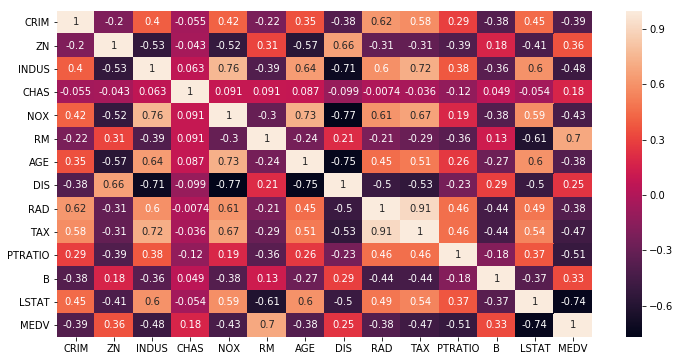

In [70]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot = True)

*Which are the highest positively and negatively correlated features? If so, please do a scatterplot on both instances to demonstrate the correlation*

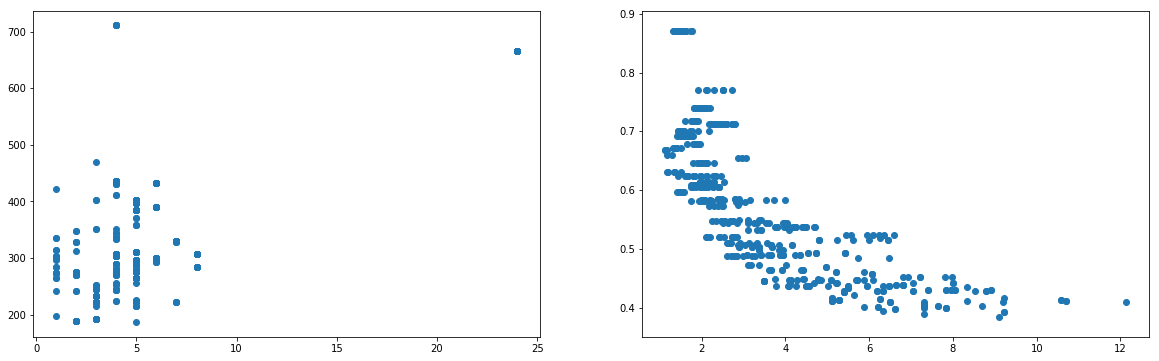

In [137]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

ax1.scatter(df['RAD'], df['TAX'])
ax2.scatter(df['DIS'], df['NOX'])

*With respect to the target varriable, which the features that has the most negatively correlated and positively correlated values respectively? Plot them to demonstrate the correlation*

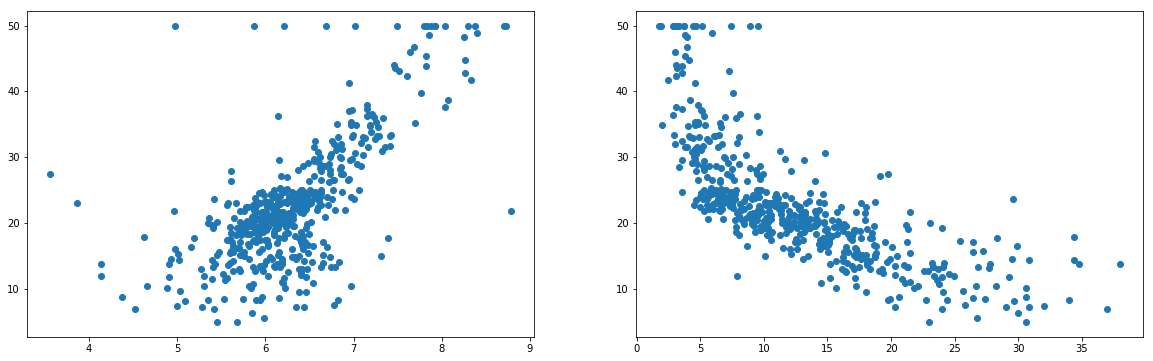

In [138]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

ax1.scatter(df['RM'], df['MEDV'])
ax2.scatter(df['LSTAT'], df['MEDV'])

*Can you show me the instances whereby the feature `ZN` has a value of more than 90?*

In [121]:
df[df['ZN'] > 90]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
57,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0


*Show me the entry where `LSTAT` has the maximum value*

In [142]:
df[df['LSTAT'] == df['LSTAT'].max()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
375,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.137,24.0,666.0,20.2,396.9,37.97,13.8


*Plot the histogram for the target variable `MEDV`*

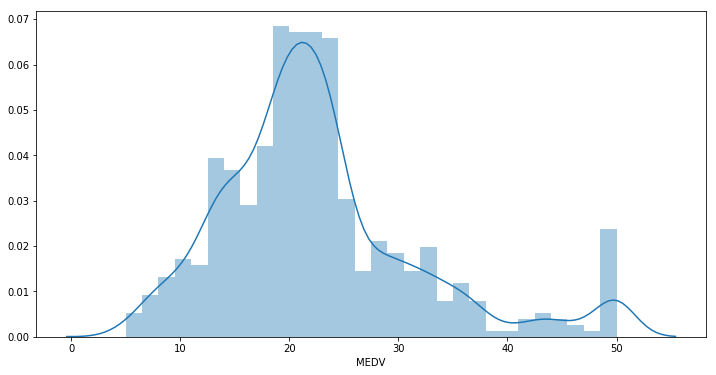

In [146]:
plt.figure(figsize = (12, 6))
sns.distplot(df['MEDV'], bins = 30)

*Is there any outliers present in the dataset?*

# Modelling

*Perform data splitting*

In [183]:
from sklearn.model_selection import train_test_split

features = df.columns[:-1]
target = df.columns[-1]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

*Utilize a linear regression model*

In [184]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

*Evaluate our linear regression model's performance on the dataset*

Our linear regression model's mean squared error is 22.13167789430412


Text(0,0.5,'Ground Truth')

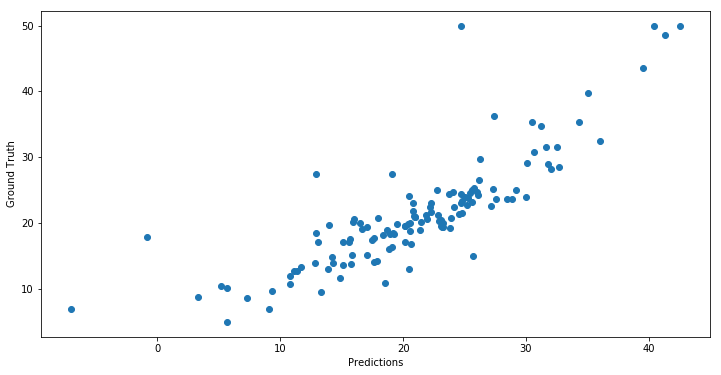

In [189]:
from sklearn.metrics import mean_squared_error

print("Our linear regression model's mean squared error is {}".format(mean_squared_error(y_pred, y_test)))

plt.figure(figsize = (12, 6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')

*Utilize a Ridge Regression model and evaluate the performance on the dataset*

Our ridge regression model's mean squared error is 12.890261339972914


Text(0,0.5,'Ground Truth')

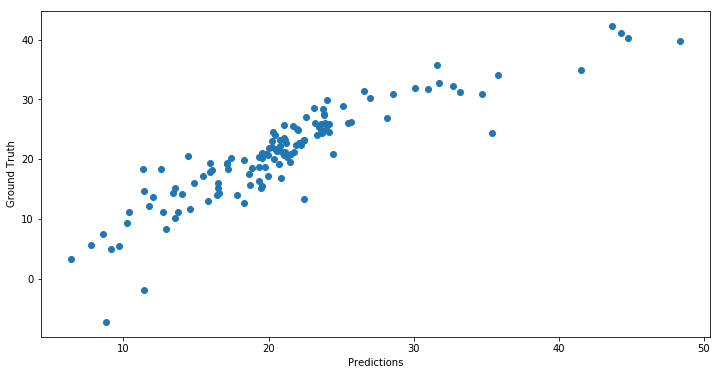

In [192]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_test = ridge.predict(X_test)

print("Our ridge regression model's mean squared error is {}".format(mean_squared_error(y_pred, y_test)))
plt.figure(figsize = (12, 6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')

*Utilize XGBoost regressor and evaluate the performance*

Our XGBoost model's mean squared error is 12.890261339972914


Text(0,0.5,'Ground Truth')

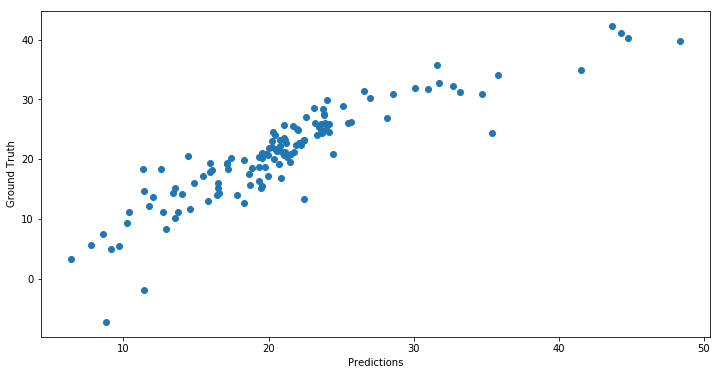

In [195]:
import xgboost as xgb

regressor = xgb.XGBRegressor()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Our XGBoost model's mean squared error is {}".format(mean_squared_error(y_pred, y_test)))
plt.figure(figsize = (12,6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')

# K-Folds Cross Validation

In [201]:
from sklearn.model_selection import KFold
import xgboost as xgb

model = xgb.XGBRegressor()
skf = KFold(n_splits=10)

mse_list = []

for i, (train_idx, test_idx) in enumerate(skf.split(X,y)):
    X_train = X[train_idx]
    y_train = y[train_idx]
    
    X_test = X[test_idx]
    y_test = y[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_pred, y_test)
    mse_list.append(mse)
    
    print("Iteration {}: MSE {}".format(i, mse))

print("Average MSE over 10 fold cross validation: {}".format(sum(mse_list)/len(mse_list)))

Iteration 0: MSE 9.069363437979177
Iteration 1: MSE 5.039588242688809
Iteration 2: MSE 9.538284441451191
Iteration 3: MSE 19.771211595338144
Iteration 4: MSE 12.740450899155208
Iteration 5: MSE 12.910780914634088
Iteration 6: MSE 8.871777336771494
Iteration 7: MSE 81.20430417576348
Iteration 8: MSE 18.172676947654708
Iteration 9: MSE 14.21133253425655
Average MSE over 10 fold cross validation: 19.152977052569284


# Hyperparameter Optimization

In [206]:
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

estimator = xgb.XGBRegressor() 
kf = KFold(n_splits = 10)

def status_print(optim_result):
    """Status callback during bayesian hyperparameter search"""

    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)

    print('Model #{}\nBest Score: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        ', '.join([key + '=' + str(value) for key, value in
                   bayes_cv_tuner.best_params_.items()])
    ))

    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results_{}.csv".format(idx), index=False)

search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'n_estimators': (250, 300, 350, 400),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    }

kf = KFold(n_splits = 10)

bayes_cv_tuner = BayesSearchCV(
    estimator=estimator,
    search_spaces=search_spaces,
    cv=kf,
    n_jobs=2,
    n_points=2,
    n_iter=50,
    verbose=0,
    refit=True,
    random_state=42
)

bayes_cv_tuner.fit(X, y)

BayesSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_iter=50, n_jobs=2, n_points=2,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'learning_rate': (0.01, 1.0, 'log-uniform'), 'min_child_weight': (0, 10), 'max_depth': (0, 50), 'max_delta_step': (0, 20), 'subsample': (0.01, 1.0, 'uniform'), 'colsample_bytree': (0.01, 1.0, 'uniform'), 'colsample_bylevel': (0.01, 1.0, 'uniform'), 'reg_lambda': (1e-09, 1000, 'log